# Chapter 5. 지도 학습: 회귀
지도 학습의 문제는 '회귀'와 '분류'의 문제로 나눌 수 있다. 회귀는 입력에 대해 연속적인 값을 대응시키는 문제이며, 분류는 입력에 대해 순서가 없는 클래스(라벨)을 대응시키는 문제이다. 
<br/><br/><br/>
# 5.1 1차원 입력 직선 모델
나이 x와 키 t가 세트로 된 데이터를 생각하자. <br/> 
<img src="img/510.png" width="400" align="left">
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
N은 인원수를 나타내며, N=16이라고 가정하자. xn을 '입력 변수', tn을 '목표 변수(때상)'이라고 한다. n은 각 개인을 나타내는 데ㅣ터의 인덱스이다. 모든 데이터를 정리한 x를 '입력 데이터', t를 '목표 데이터'라고 부르기로 하자. 목적은 데이터베이스에 없는 사람의 나이에 대해 그 사람의 키 t를 예측하는 것이다.
<br/>
먼저 나이와 몸무게의 인공 데이터를 만들자. 어떻게 생성했는지는 이 장의 끝에서 알려준다.

In [2]:
# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성------------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한
X_max = 30 # X의 하한 
X_n = 16 # X의 하한
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (b)


(A)에 의해 X에서 T를 결정하고 있다. (B)에서 생성한 데이터를 'ch_5_data.npz'에 저장한다.

In [5]:
# 리스트 5-1-(2)
(print(X))

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


반올림하는 np.round 함수를 사용해 깔끔하게 표시하자.

In [6]:
# 리스트 5-1-(3,4)
print(np.round(X,2))
print(np.round(T,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


X와 T를 그래프로 표시하자.

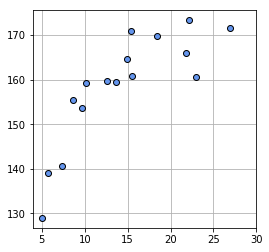

In [13]:
# 리스트 5-1-(5)
# 데이터 그래프 -----------------------------
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle = 'None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

<br/><br/><br/>
## 5.1.1 직선 모델
위의 플롯을 보면 에티터가 고르지 않기 때문에, 새로운 나이 데이터에 키를 정확히 맞추는 것을 불가하다. 그러나 어느 정도 오차를 허용한다면 주어진 데이터에서 직선을 긋는 것으로 그럴듯 하게 예측할 수 있을 것이다. 직선의 방정식은 다음과 같이 나타낼 수 있다. <br/>
<img src="img/511.png" width="250" align="left">
<br/><br/><br/><br/><br/>
기울기를 나타내는 w0와 절편을 나타내는 w1에 적당한 값을 넣으면, 다양한 위치와 기울기의 직선을 만들 수 있다. 이 수식은 입력 x에 y(x)를 출력하는 함수로 볼 수 있으므로, y(x)는 x에 대한 t의 예측지로 간주할 수 있다. 이 직선이 데이터에 부합하려면 w0와 w1을 어떻게 정할까?
<br/><br/><br/>
## 5.1.2 제곱 오차 함수
'데이터에 부합하도록' 다음과 같이 오차 J를 정의한다. <br/>
<img src="img/512.png" width="400" align="left">
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
여기서 yn은 직선 모델에 xn을 넣었을 때의 출력을 나타낸다. J는 평균제곱 오차(Mean Sqaure erro, MSE)로, 이는 직선과 데이터 점의 차의 제곱의 평균이다. w0와 w1을 결정하면 그에 대한 평균 제곱 오차 J를 계산할 수 있다. 

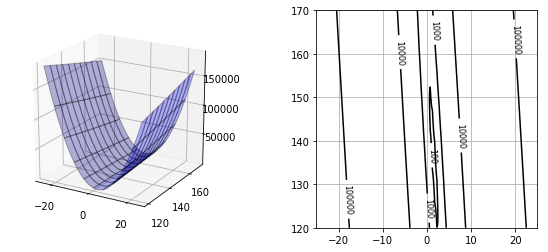

In [39]:
# 리스트 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수 ----------------------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y-t)**2)
    return mse

# 계산 --------------------------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25,25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0,x1)
J = np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 --------------------------------------------------------
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.4)

ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont = plt.contour(xx0,xx1, J, 30, colors='black', levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
plt.show()

w0방향의 변화에 J가 크게 변하는 것을 알 수 있다. 기울기가 조금이라도 바뀌면 직선의 데이터 점에서 크게 어긋나기 때문이다. 그러나 3D 그래프는 w1방향의 변화를 알기 힘들다. 그래서 등고선의 그래프도 오른쪽에 표시했다. 아무래도 w0 = 3, w1=135 근처에서 J가 최솟값을 취할 것같다.

<br/><br/><br/>
##  5.1.3 매개 변수 구하기(경사 하강법)

그러면 J가 가장 작아지는 w0와 w1은 어떻게 구할까? 가장 간단하고 기본적인 방법은 경사하강법이다. 우선 초기 위치로 적당한 w0와 w1을 결정한다. 이는 J지형 위의 한 지점에 대응한다. 이 점에서의 기울기를 확인하고 J가 가장 감소하는 방향으로 w0와 w1를 조금만 진행한다. 이 절차를 여러 번 반복하여 최종적으로 J가 가장 작아지는 '그릇의 바닥'인 w0와 w1에 도착할 수 있다. 다음은 J의 기울기를 나타낸다. <br/>
<img src="img/513-1.png" width="500" align="left">
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
w의 갱신 방법을 행렬표기로 나타내면 다음과 같다. <br/>
<img src="img/513-2.png" width="600" align="left">

여기서 α값은 학습률로, 크게 만들면 갱신은 커지지만 수습이 어려워지므로 적당히 줄여야 한다. 이것을 프로그램으로 구현하여 보자. 먼저 기울기를 계산하는 함수 dmse_line(x,t,w)를 만든다. 인수 데이터 x,t및 매개변수 w를 전달하면 w의 기울기 d_w0,d_w1을 돌려준다. 

In [26]:
# 리스트 5-1-(7)
# 평균 제곱 오차의 기울기 ----------------------
def dmse_line(x,t,w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y-t) * x)
    d_w1 = 2 * np.mean(y-t)
    return d_w0, d_w1

시험 삼아 w = [10, 165]의 기울기를 구해보자.

In [28]:
# 리스트 5-1-(8)
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


w0 방향의 기울기는 w1 방향의 기울기보다 더 큰 것을 알 수 있다. 이제 경사하강법을 fit_line_num(x,t)로 구현해보자. fit_line_num(x,t)는 데이터 x,t를 인수로 하여 mse_line을 최소화하는 w를 돌려준다.w는 초기 값 w_init = [10.0, 165.0]에서 시작하여 dsme_line에서 구한 기울기 w를 갱신하고 있다. 갱신 단계의 폭이 되는 학습 비율은 alpha = 0.001로 한다. w이 평평한 곳에 도달하면(즉 기울기가 충분히 작아지면), w의 갱신을 종료한다. 여기서는 기울기의 각 요소의 절대값이 eps=0.1보다 작아지면 for문에서 빠져 나오게 되어 있다. 프로그램을 실행하면 마지막으로 얻어진 w값 등을 표시하고 w의 갱신 내역을 그래프로 표시한다.

반복 횟수 13820
W = [1.539947, 136.176160]
dMSE = [-0.005794, 0.099991]
MSE = 49.027452


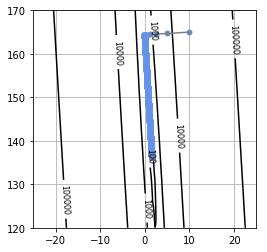

In [56]:
# 리스트 5-1-(9)
# 경사 하강법 -----------------------------------------------------------------
def fit_line_num(x,t):
    w_init = [10.0,165.0] # 초기 매개 변수
    alpha = 0.001 #학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i-1])
        w_i[i,0] = w_i[i-1,0] - alpha*dmse[0]
        w_i[i,1] = w_i[i-1,1] - alpha*dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대값
            break
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

# 메인 -------------------------------------------------------------------------
plt.figure(figsize=(4,4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
x0_range = [-25, 25]
x1_range = [120,170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors = 'black', levels=(100,1000,10000,100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

# 경사 하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X,T)

#결과보기
print('반복 횟수 {0}'.format(W_history.shape[0])) #행의 갯수 받기
print('W = [{0:.6f}, {1:.6f}]'.format(W0,W1))
print('dMSE = [{0:.6f}, {1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE = {0:.6f}'.format(mse_line(X, T, [W0,W1])))
plt.plot(W_history[:,0], W_history[:,1],'.-', color='gray', markersize=10, markeredgecolor = 'cornflowerblue')
plt.show()

위에서 구한 W0와 W1의 값을 직선 식에 대입하여 데이터 분포에 겹쳐서 그려보자.

w0=1.540, w1=136.176
SD=7.002 cm


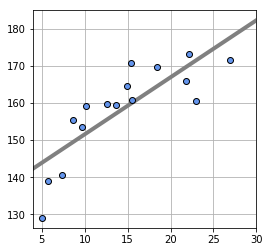

In [61]:
# 리스트 5-1-(!0)
# 선 표시 ---------------------------------------------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color = (.5,.5,.5),linewidth=4)

# 메인 ------------------------------------------------------------------------
plt.figure(figsize=(4,4))
W=np.array([W0,W1])
mse = mse_line(X,T,W)
print("w0={0:.3f}, w1={1:.3f}".format(W0,W1))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

이 때의 평균 제곱 오차는 49.03cm^2였으므로, 직관적으로 오차가 얼마나 되는지 알기 위해 제곱근을 취한다. 그러면 7.00cm이다. 직선과 데이터의 차이는 대략 7.00cm라는 것이다. 이 평균 제곱 오차의 제곱급을 표준 편차(standard deviation,SD)라고 한다. <br/>
 주의할 점은 일반적으로 경사 하강법으로 구해지는 해는 어디까지나 극솟값이며, 전체의 최솟값을 아니라는 것이다. 만약 J가 곳곳에 움푹 들어간 모양을 하고 있으면, 최소 제곱법으로는 초기값 근처의 함몰 지점(극솟값)에 수렴하게 된다. J가 복잡한 모양을 하고 있을 때, 가장 깊은 함몰(최솟값)을 구하는 것은 어려운 문제이다. 다양한 초기 값에서 경사 하강법을 여러 번 시도하여, 구 중 가장 J가 작아진 지점을 최솟값으로 채용하는 근사적인 방법을 생각할 수 있다.

<br/><br/><br/>
## 5.1.4 선형 모델 매개 변수의 해석해
경사 하강법은 반복 계산에 의해 근사값을 구하는 수치 계산법이다. 이러한 풀이를 수치해라고 한다. 그러나 사실은 직선 모델의 경우에는 근사적인 해석이 아니라 방정식을 해결하여 정확한 해를 구할 수 있다. 이러한 풀이를 해석해라고 한다. 해석해를 사용하면 1회 계산만으로 최적의 w를 구할 수 있다.계산 시간도 바르고 정확하다. <br/>
 또한 해석해를 도출하면 문제의 본질을 잘 이해할 수 있고, 다차원 데이터에 대응하며, 곡선 모델로 확장하기 좋고, 커널법 등의 이해를 돕는다.
 <br/>
 그럼 다시 확인해 보자. 목표는 'J가 극소화되는 지점 w를 찾기'이다. 그 지점의 기울기는 0이므로, 기울기가 0이 되는 지점을 찾으면 된다.

<img src="img/514.png" width="600" align="left">

w0=1.558, w1=135.872
SD=7.001cm


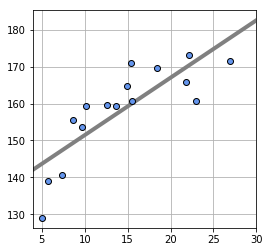

In [66]:
# 리스트 5-1-(11)
# 해석해 --------------------------------------------
def fit_line(x,t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0*mx
    return np.array([w0,w1])

# 메인 --------------------------------------------------
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0],W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

즉, 직선으로 피팅하면 해석해를 도출할 수 있으므로 경사 하강법을 사용할 필요가 없다.
<br/><br/><br/>
# 5.2 2차원 입력면 모델
다음은 입력이 2차원인 경우, x=(x0,x1)에 확장할 것이다. 1차원의 경우 xn은 나이만을 의미했지만, 이와 함께 몸무게 정보도 사용하여 키를 예측한다. 먼저 몸무게의 데이터를 인공적으로 만들자. 데이터에 포함되는 사람의 체질량 지수가 평균 23이라고 가정하여 다음 식을 이용한다.

    몸무게 = 23 * 키^2 / 100 + 노이즈
    
몸무게는 키의 제곱에 비례한다는 단순한 식이다. 원래 나이 x0로, 몸무게의 데이터를 x1으로 추가한다. 

In [71]:
#리스트 5-1-(12,13)
# 2차원 데이터 생성 -----------------------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(1) #난수를 고정
X1 = 23 * (T/100)**2 + 2 * np.random.rand(X_n)
X1_min = 40
X1_max = 75

print(np.round(X0,2))
print(np.round(X1,2))
print(np.round(T,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[68.02 60.82 38.28 59.27 55.88 45.63 54.67 59.15 63.19 67.27 60.24 70.44
 58.78 69.42 44.47 64.62]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


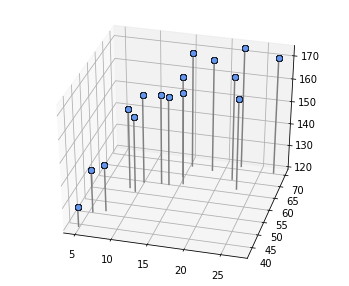

In [76]:
# 리스트 5-1-(14)
# 2차원 데이터의 표시 -----------------------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color= 'gray')
        ax.plot(x0,x1,t,'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)
        
        
# 메인 ---------------------------------------------------------
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

## 5.2.1 데이터의 표시방법
데이터의 번호는 이미 n으로 나타내었으므로, 벡터의 요소(0=나이, 1=몸무게 등) 번호는 m으로 나타내도록 하자.<br/>
<img src="img/521.png" width="500" align="left">

<br/>

## 5.2.2 면 모델

임의의 w에 대해 면을 그리는 함수 show_plane(ax, w)를 준비한다. ax라는 인수는 3차원 그래프를 그릴 때 필요한 묘사 대상 그래프의 id이다. 평균 제곱 오차를 계산하는 함수 mse_plane(x0,x1,t,w)도 만든다.

SD=14.228cm


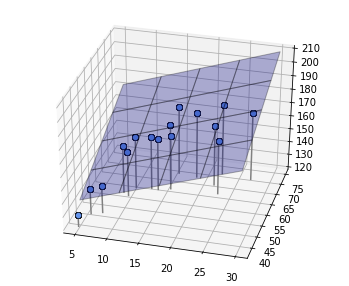

In [79]:
# 리스트 5-1-(15)
# 면의 표시 ----------------------------------------------------
def show_plane(ax,w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0] * px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')
    
#면의 MSE ------------------------------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y-t)**2)
    return mse

# 메인 ---------------------------------------------------------
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection='3d')
W = [1.5, 1, 90]
show_plane(ax,W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.show()

# 5.2.3 매개 변수의 해석해
데이터에 가장 적합한 w=[w0,w1,w2]를 구해보자. <br/>
<img src="img/523.png" width="700" align="left">

w0=-0.2, w1=1.5, w2=75.3
SD=0.500 cm


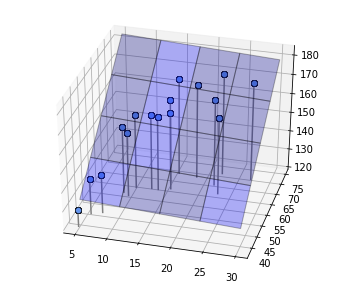

In [80]:
# 리스트 5-1-(16)
# 해석해 ------------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


# 5.3 D차원 선형 회귀 모델 

<br/>

## 5.3.1 D차원 선형 회귀 모델

1차원 입력에서 다룬 직선 모델, 2차원 입력에서 다룬 면 모델은 모두 선형 회귀 모델이라는 같은 종류의 모델이다. 쉽게 살펴보기 위해 절편의 항을 포함하지 않는 모델로 생각해보자.
<img src="img/531.png" width="600" align="left">

<br/><br/>
## 5.3.2 매개 변수의 해석해
<img src="img/532-1.png" width="600" align="left">
<img src="img/532-2.png" width="600" align="left">
<img src="img/532-3.png" width="600" align="left">

## 5.3.3 원점을 지나지 않는 면에 대한 확장
이번에는 원점을 지나지 않는 면으로 확장하여 보자.

    y(x) = w0x0 + w1x1+ w2x2 = w0x0 + w1x1 + w2
    
이는 2차원벡터 x에 항상 1을 얻는 3차원의 요소 x2=1을 추가하여 x를 3차원 벡터라고 생각한 것이다. 이렇게 항상 1을 취하는 차원을 입력 데이터 x에 추가하고 적용하면 원점에 얽매이지 않는 면을 구할 수 있다.

# 5.4 선형 기저 함수 모델
곡선을 사용하여 나타내면 오차가 더 작아질 수 있다. 이번에는 곡선 모델을 생각해보자. 곡선을 나타내는 모델은 여러가지 종류가 있지만, 여기에서는 범용성이 높은 '선형 기저 함수 모델'을 소개한다. 기저 함수는 '바탕이 되는 함수'라는 뜻이다. 5.3절에서 소개한 선형 회귀 모델의 x를 기저함수로 대체해 여러 형태의 함수를 마드는 것이 선형 기저 함수 모델의 생각히다. 먼저 무엇을 기저 함수로 할지 선택할 필요가 있는데, 여기에서는 가우스 함수를 기저 함수로 선택하였다. <br/>
<img src="img/540.png" width="400" align="left">

가우스 함수의 중심 위치는 